# Navigating Patient Records

In [1]:
# this makes sure it starts looking for things from the CausalFitbit folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\CausalFitbit


## Generating Patient .txt records

In [2]:
from PatientSimpRecord import *
# write_all_patient_simp_files()

## DAG Atlas creation¶
The results of the following step can be found in the short_stories_dag_atlas directory. They are 3 pickled files, one for each of the 3 short stories. They will be opened in the next step.

In [3]:
from DagAtlas import *

simp_dir = "patient_simp_records"
dag_dir = "patient_dag_atlas"
atlas = DagAtlas(simp_dir, dag_dir)
all_titles = [file_name[:-len(".txt")] \
              for file_name in my_listdir(simp_dir)]
atlas.update_arrows_in_batch_of_m_scripts(
    batch_titles=all_titles[0:2])

Initiating DagAtlas object: 0.00 minutes

Starting comparison of 2 titles: 0.00 minutes
title1 and its num of nodes: patient_1503960366 1040
title2 and its num of nodes: patient_1624580081 1001
product of numbers of nodes= 1041040
Starting bridges: 0.00 minutes
1 bridges
2 bridges
3 bridges
4 bridges
5 bridges
6 bridges
7 bridges
8 bridges
9 bridges
10 bridges
11 bridges
12 bridges
13 bridges
14 bridges
15 bridges
16 bridges
17 bridges
18 bridges
19 bridges
20 bridges
21 bridges
22 bridges
23 bridges
24 bridges
25 bridges
26 bridges
27 bridges
28 bridges
29 bridges
30 bridges
31 bridges
32 bridges
33 bridges
34 bridges
35 bridges
36 bridges
37 bridges
38 bridges
39 bridges
40 bridges
41 bridges
42 bridges
43 bridges
44 bridges
45 bridges
46 bridges
47 bridges
48 bridges
49 bridges
50 bridges
51 bridges
52 bridges
53 bridges
54 bridges
55 bridges
56 bridges
57 bridges
58 bridges
59 bridges
60 bridges
61 bridges
62 bridges
63 bridges
64 bridges
65 bridges
66 bridges
67 bridges
68 bridges

# Visualizing
In the following step, we a draw DAG for each of the 3 short stories, based on the pickled files in the short_stories_dag_atlas directory. We do this for 2 arrow repetition thresholds: 3, 4.


In [4]:
from Dag import *

def visualize_all_dags(prob_acc_thold, nsam_thold, draw, with_FULL=True):

    dag_dir = "patient_dag_atlas"
    simp_dir = "patient_simp_records"
    if with_FULL:
        clean_dir = "patient_csv_records"
    else:
        clean_dir = None
    file_names = [file_name for
                  file_name in my_listdir(dag_dir)[0:3]]
    dags = []
    for fname in file_names:
        path = dag_dir + "/" + fname
        with open(path, "rb") as f:
            dag = pik.load(f)
            dags.append(dag)
    for dag in dags:
        print("-------------------------")
        print(dag.m_title)
        hprobs_arrows = dag.build_high_prob_acc_arrows(
            prob_acc_thold, nsam_thold)
        print({arrow_str(arrow):dag.arrow_to_acc_rej_nums[arrow] \
               for arrow in hprobs_arrows})
        print()
        if draw:
            dag.draw(prob_acc_thold, nsam_thold, jupyter=True)
            dag.print_map_legend(clean_dir, simp_dir, prob_acc_thold, nsam_thold)

-------------------------
patient_1503960366
{}



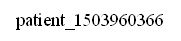

MAP LEGEND
title: patient_1503960366
prob of acceptance threshold: 0.95
number of samples threshold: 35
number of arrows shown: 0
number of arrows dropped: 11687
-------------------------
patient_1624580081
{'(2,31)->(24,17)': [48, 0], '(2,31)->(4,31)': [48, 0], '(2,31)->(12,31)': [48, 0], '(2,31)->(13,31)': [48, 0], '(2,31)->(25,31)': [48, 0], '(4,17)->(14,19)': [40, 0], '(4,17)->(16,19)': [40, 0], '(12,17)->(14,19)': [40, 0], '(12,17)->(16,19)': [40, 0], '(13,17)->(14,19)': [40, 0], '(13,17)->(16,19)': [40, 0], '(3,31)->(14,19)': [40, 0], '(3,31)->(16,19)': [40, 0], '(9,31)->(14,19)': [40, 0], '(9,31)->(16,19)': [40, 0], '(14,31)->(16,19)': [40, 0]}



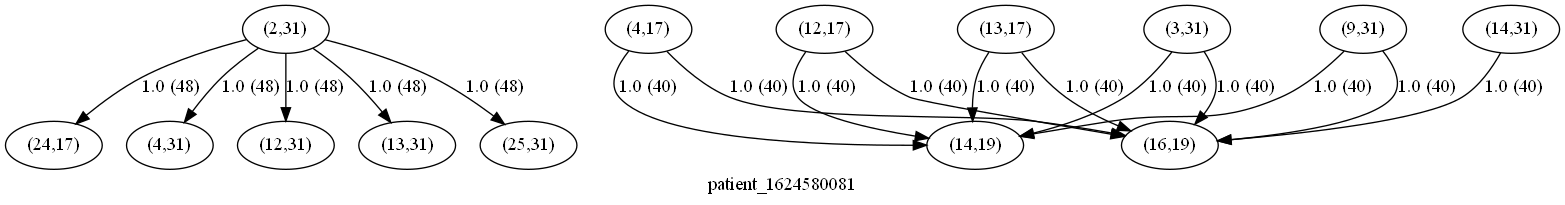

MAP LEGEND
title: patient_1624580081
prob of acceptance threshold: 0.95
number of samples threshold: 35
number of arrows shown: 16
number of arrows dropped: 12277
(2,31):
(FULL) 
(PART) WeightPounds= 136.907 &z= -0.208
(3,31):
(FULL) 
(PART) WeightPounds= 136.025 &z= -0.281
(4,31):
(FULL) 
(PART) WeightPounds= 135.584 &z= -0.318
(4,17):
(FULL) 
(PART) BMI= 24.0 &z= -0.4
(9,31):
(FULL) 
(PART) WeightPounds= 136.025 &z= -0.281
(12,31):
(FULL) 
(PART) WeightPounds= 135.584 &z= -0.318
(12,17):
(FULL) 
(PART) BMI= 24.0 &z= -0.4
(13,31):
(FULL) 
(PART) WeightPounds= 135.584 &z= -0.318
(13,17):
(FULL) 
(PART) BMI= 24.0 &z= -0.4
(14,19):
(FULL) 
(PART) Calories= 1402.0 &z= -0.317
(14,31):
(FULL) 
(PART) WeightPounds= 136.025 &z= -0.281
(16,19):
(FULL) 
(PART) Calories= 1401.0 &z= -0.321
(24,17):
(FULL) 
(PART) BMI= 23.93 &z= -0.46
(25,31):
(FULL) 
(PART) WeightPounds= 135.584 &z= -0.318


In [5]:
visualize_all_dags(prob_acc_thold=.95, nsam_thold=35, draw=True, with_FULL=False)